In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
# Kshitiz Bhargava 21BCE2067

In [2]:
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()
# Kshitiz Bhargava 21BCE2067

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()
# Kshitiz Bhargava 21BCE2067

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
age_imputer =SimpleImputer(strategy='median')
embarked_imputer=SimpleImputer(strategy='most_frequent')

#Chnaging the Column Age and Embarked after adding the missing value
df['Age']=age_imputer.fit_transform(df[['Age']])
df['Embarked']=embarked_imputer.fit_transform(df[['Embarked']]).ravel()

#Droping the Cabin Column
df.drop(columns=['Cabin'], inplace=True)
df.isnull().sum()
# Kshitiz Bhargava 21BCE2067

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
df.head()
# Kshitiz Bhargava 21BCE2067

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder_sex_embarked=encoder.fit_transform(df[['Sex', 'Embarked']])
encoder_df = pd.DataFrame(encoder_sex_embarked,columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

df.drop(columns=['Sex', 'Embarked'], inplace=True)
df=pd.concat([df, encoder_df],axis=1)
# Kshitiz Bhargava 21BCE2067

In [7]:
df.head()
# Kshitiz Bhargava 21BCE2067

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,1.0


In [8]:
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
# Kshitiz Bhargava 21BCE2067

In [9]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
target = 'Survived'
X = df[features]
y = df[target]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Kshitiz Bhargava 21BCE2067

Training set shape: (712, 8)
Testing set shape: (179, 8)


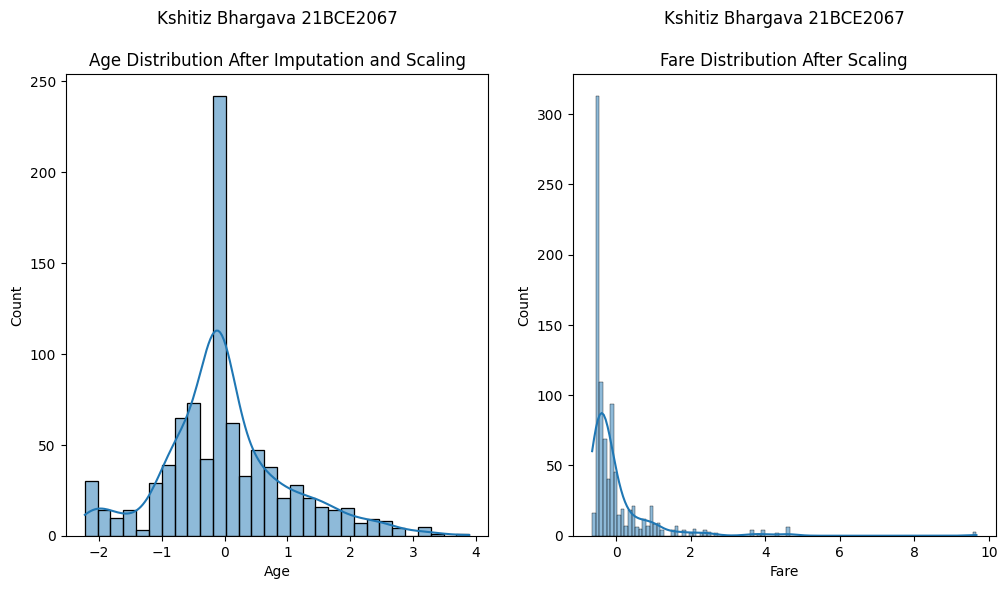

In [10]:
print ("Training set shape:", X_train.shape) 
print ("Testing set shape:", X_test.shape)
# Visualize the distribution of a numerical feature before and after scaling
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['Age'], kde=True, ax=ax[0])
ax[0].set_title('Kshitiz Bhargava 21BCE2067\n\nAge Distribution After Imputation and Scaling')
sns.histplot(df['Fare'], kde=True, ax=ax[1])
ax[1]. set_title('Kshitiz Bhargava 21BCE2067\n\nFare Distribution After Scaling')
plt.show()
# Kshitiz Bhargava 21BCE2067